In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
import socket
print(socket.gethostname())
import torch
print(torch.cuda.is_available())
# Which id has the current device
print(torch.cuda.current_device())
# the name (type) of this device
# print(torch.cuda.get_device_name(0))
# how many devices are available in this session?
# print(torch.cuda.device_count())

/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/bin/python3
3.8.3 (default, Jun 10 2020, 13:23:17) 
[GCC 10.1.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
gpu62
True
0


In [2]:
import os
import glob
# import imageio
import random, shutil
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
#import librosa
#import librosa.display
import requests
# import cv2

import torch.nn.functional as F
from torchvision.utils import save_image
from sklearn.metrics import r2_score 
from pathlib import Path
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import VAE_functions as func
# from google.colab import drive

In [31]:
file_name = 'np_db_spec_10genres_99songs.npy'
audio_labels, spectrograms, genres = func.load_spectrograms(file_name)

In [32]:
batch_size = 5

In [33]:
train_dataset = func.SpectogramDataset(audio_labels, spectrograms, train=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0) 

valid_dataset = func.SpectogramDataset(audio_labels, spectrograms, valid=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

test_dataset = func.SpectogramDataset(audio_labels, spectrograms,)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

feature size: torch.Size([5, 1, 256, 640]) label size: torch.Size([5])


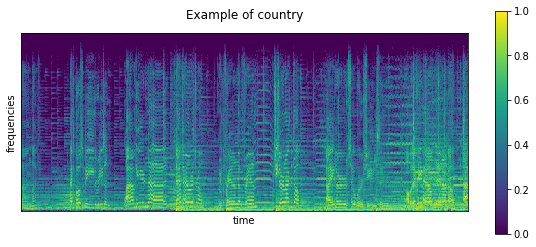

In [34]:
# @title Show Example input
train_features, train_labels = next(iter(train_dataloader))
print('feature size:', train_features.shape, 'label size:', train_labels.shape)
plt.matshow(train_features[0,0], origin='lower')
plt.colorbar()
plt.ylabel('frequencies')
plt.xlabel('time')
# genere_type = genres[int(np.where(train_labels[0] == 1)[0])]
# plt.title('Example of ' + genere_type)
plt.title('Example of ' + genres[int(train_labels[0])] )
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
# @title Set Device
device = func.Set_Device()

Device:  cuda


In [10]:
# Hyperparameters
num_epochs = 1
learning_rate = 10e-3

simple_model = func.VAE_simple(imgChannels=1, batch_size = batch_size).to(device)
_ = func.print_n_parameters(simple_model)

(train_loss, train_r2, 
validation_loss, validation_r2, 
train_class_loss, validation_class_loss, 
train_acc, validation_acc) = func.train(simple_model, 
                                       device, 
                                       train_dataloader, 
                                       valid_dataloader, 
                                       num_epochs, 
                                       learning_rate)
# plot_loss_accuracy(train_loss, train_acc, validation_loss, validation_acc)

Number of parameters in the model:  203739


  0%|          | 0/1 [00:00<?, ?epoch/s]

/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/lib/python3.8/site-packages/torch/nn/functional.py:3451: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/nfs/scistore08/kondrgrp/emaksimo/GTZAN/VAE_functions.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x) #torch.nn.Softmax(x)


Batch #0. Current loss: 0.61, L_class 75.19%, L_recons 23.04% , L_KLdiv 1.76%. Accuracy train: 0.00
Batch #100. Current loss: 0.47, L_class 97.36%, L_recons 0.87% , L_KLdiv 1.77%. Accuracy train: 9.90


In [33]:
# simple_model.state_dict()

In [4]:
m_name = 'model_24803416_0.pt'
o_name = 'model_output_24803416_0.pkl'
out_path = '/nfs/scistore08/kondrgrp/emaksimo/GTZAN/models/'
# torch.save(simple_model, out_path)

In [5]:
old_model = torch.load('{}{}'.format(out_path, m_name))
res = torch.load('{}{}'.format(out_path, o_name))

/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/lib/python3.8/site-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/lib/python3.8/site-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/lib/python3.8/site-packages/torch/serialization.py:656: SourceChangeWarning: source c

In [6]:
res

{'train_loss': [tensor(2.4321, device='cuda:0', requires_grad=True)],
 'train_r2': [0.0],
 'validation_loss': [2.3620643854141234],
 'validation_r2': [0.0],
 'train_class_loss': [tensor(0.1161, device='cuda:0', requires_grad=True)],
 'validation_class_loss': [tensor(0.2349, device='cuda:0', requires_grad=True)],
 'train_acc': [tensor(11.4286, device='cuda:0')],
 'validation_acc': [tensor(7.1066, device='cuda:0')],
 'batch_size': 20,
 'num_epochs': 1,
 'learning_rate': 0.001}

In [26]:
res['train_acc']

[tensor(11.4286, device='cuda:0')]

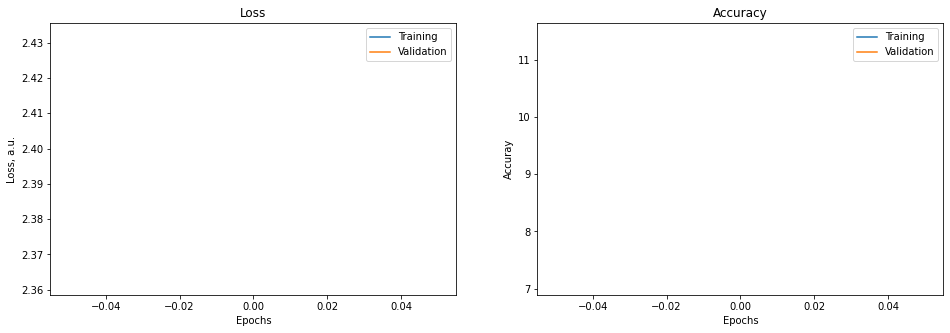

In [28]:
func.plot_loss(torch.stack(res['train_loss']).cpu(),
               res['validation_loss'], 
               torch.stack(res['train_acc']).cpu(), torch.stack(res['validation_acc']).cpu(), 
               res['num_epochs'], old_model)

/mnt/nfs/clustersw/Debian/stretch/JupyterPython/0.8/JupyterIST/lib/python3.8/site-packages/torch/nn/functional.py:3451: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/nfs/scistore08/kondrgrp/emaksimo/GTZAN/VAE_functions.py:138: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x) #torch.nn.Softmax(x)


CPU times: user 1.51 s, sys: 19.8 ms, total: 1.53 s
Wall time: 341 ms


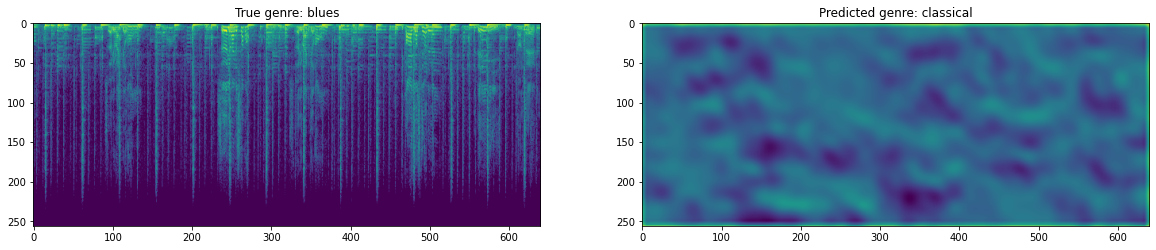

In [37]:
%%time
old_model.eval()
with torch.no_grad():
    for data in random.sample(list(test_dataloader), 1):
        imgs, labels = data
        imgs = imgs.to(device)
        img = np.transpose(imgs[0].cpu().numpy(), [1,2,0])
        plt.figure(figsize = (20,10))
        ax1 = plt.subplot(121)
        ax1.set_title('True genre: {}'.format(genres[int(labels[0])]))
        plt.imshow(np.squeeze(img))
        
        out, mu, logVAR, class_out = old_model(imgs)
        outimg = np.transpose(out[0].cpu().numpy(), [1,2,0])
        predicted_class = torch.argmax(class_out[0])
        ax2 = plt.subplot(122)
        ax2.set_title('Predicted genre: {}'.format(genres[int(predicted_class)]))
        plt.imshow(np.squeeze(outimg))
#         plt.colorbar()
        break